# CO₂ Emissions — Step-by-Step Analysis

Read → Inspect → Clean → Transform → Visualize-Histogram by year → Map Visualization → Dashboard

In [2]:
import nbformat
from nbformat.sign import NotebookNotary
from pathlib import Path

nb_path = Path("Global_CO2_Analysis.ipynb")  # 改成你的文件名或绝对路径
nb = nbformat.read(nb_path, as_version=4)

notary = NotebookNotary()  # 读取本机的 nbsignatures.db
is_trusted = notary.check_signature(nb)
print("Jupyter signature trusted:", is_trusted, "\nFile:", nb_path.resolve())


Jupyter signature trusted: False 
File: D:\Richard\Learning\IBM Data Analyst\Activity_IBM_Data_Analyst\Course_8_Data_Visualization_with_Python\Global_CO2_Analysis\notebooks\Global_CO2_Analysis.ipynb


In [3]:
from IPython.display import HTML
HTML("""
<div id='x' style='padding:8px;border:1px solid #ccc'>
  If you can see this message and an alert pops up below, it means the Jupyter Notebook frontend has been trusted successfully.

</div>
<script>
  setTimeout(()=>alert('JS executes correctly, it means the notebook frontend has been trusted and rendering is working properly'), 200);
</script>
""")

In [4]:

# %pip install pandas numpy matplotlib seaborn plotly folium jupyter-dash requests
import os, json, pathlib, warnings, math
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from jupyter_dash import JupyterDash
from dash import Dash, html, dcc, Input, Output

pd.set_option("display.max_columns", 100)
plt.rcParams["figure.figsize"] = (8,5)

DATA_PATH = pathlib.Path("../data/co2_emissions.csv")


In [5]:
%matplotlib inline

In [6]:
COLUMN_GUESSES = {
    "country": ["country","Country","entity","Entity","name","Name"],
    "year": ["year","Year","YEAR"],
    "total_co2": ["co2","CO2","total_co2","total_emissions","emissions","Total_CO2","Total Emissions"],
    "sector_candidates": ["coal_co2","oil_co2","gas_co2","cement_co2","flaring_co2","other_industry_co2",
                          "power_industry_co2","transport_co2","residential_co2","industrial_co2"],
    "region": ["region","Region","continent","Continent","country_group","group"]
}
def pick_first_col(df: pd.DataFrame, candidates: List[str]):
    for c in candidates:
        if c in df.columns: return c
    return None

In [7]:
df_raw = pd.read_csv(DATA_PATH)
df_raw.head()

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.168,1.981,2.993,0.797,3.595,0.958,0.224,0.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,0.113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.168,1.990,3.015,0.800,3.615,0.959,0.229,0.061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.110,NaN,NaN,NaN,NaN,0.107,NaN,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,9.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.168,1.998,3.035,0.802,3.635,0.961,0.234,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,0.106,NaN,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,12.095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169,2.005,3.052,0.803,3.656,0.962,0.238,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108,NaN,NaN,NaN,NaN,0.105,NaN,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,15.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169,2.011,3.067,0.803,3.676,0.963,0.242,0.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107,NaN,NaN,NaN,NaN,0.105,NaN,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2_growth_prct       

In [9]:
df_raw.dtypes

Description                     object
Name                            object
year                             int64
iso_code                        object
population                     float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 80, dtype: object

In [10]:
df_raw.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,43746.000000,3.796500e+04,1.498900e+04,23612.000000,22715.000000,27059.000000,24987.000000,24668.000000,23585.000000,23285.000000,23285.000000,23495.000000,16790.000000,9701.000000,24868.000000,16989.000000,10350.000000,20372.000000,20040.000000,4866.000000,4502.000000,4444.000000,23591.000000,2.528100e+04,2.358500e+04,20372.000000,14515.000000,16533.000000,37236.000000,23736.000000,2902.000000,10109.000000,7696.000000,14545.000000,14013.000000,16533.000000,16229.000000,35639.000000,35813.000000,37236.000000,36434.000000,37410.000000,35813.000000,38280.000000,36320.000000,23736.000000,23373.000000,2464.000000,2902.000000,10151.000000,21960.000000,25281.000000,23585.000000,20372.000000,21960.000000,25281.000000,23585.000000,20372.000000,10869.000000,15034.000000,37236.000000,23592.000000,2108.000000,10869.000000,15034.000000,37236.000000,23592.000000,2108.000000,40828.000000,38060.000000,40828.000000,40828.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1936.641727,5.739481e+07,3.351123e+11,9.495191,0.065905,446.602788,6.664167,44.661670,535.581202,7.214604,3.539208,7.223101,2.404175,1.073606,4.003911,0.404872,0.239634,195.289335,1.339065,1319.189543,6.401285,0.349552,230.365959,1.325537e+04,2.773114e+04,9795.817446,190.460754,1985.404972,10064.594392,3939.864268,345.182243,24783.752810,1.768091,6.384209,0.286901,80.216062,0.838520,3.164192,7.729777,121.937389,4.095573,101.812434,1.858894,25.678946,0.466924,121.798658,2.285667,0.074965,16.126969,2492.937070,3.167974,3.475844,3.587468,4.357988,3.198879,3.610224,3.469044,4.543285,3.061376,4.106875,2.731304,3.365816,7.229447,3.141709,4.199124,2.605078,3.347746,7.512655,2.278887,0.003026,0.007703,0.011070,0.000509,488.542225,316.133529,-7.232399,20.524440
std,50.243385,3.301779e+08,3.112988e+12,69.088018,0.125343,2015.844863,64.737394,1775.507928,2202.219657,99.347980,268.082338,9.254779,5.912516,5.001297,14.733964,0.763448,0.257531,869.390978,2.402853,3887.611511,6.800496,0.253941,1592.369509,7.465649e+04,1.235963e+05,44358.830306,951.721730,11971.519588,44635.100233,25251.625794,975.062845,32030.991671,1.717964,27.859292,3.088592,409.212326,2.866001,8.068766,11.452202,492.984777,9.247912,473.055060,3.995184,131.139653,0.843142,664.231756,14.326966,0.056808,40.159035,11257.482287,13.885602,13.395175,11.970300,15.076420,13.783

In [11]:
print("\n=== dtypes ==="); print(df_raw.dtypes)
print("\n=== info() ==="); df_raw.info()
print("\n=== describe() ==="); display(df_raw.describe())
print("\n=== missing values ==="); display(df_raw.isna().sum().sort_values(ascending=False))


=== dtypes ===
Description                     object
Name                            object
year                             int64
iso_code                        object
population                     float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 80, dtype: object

=== info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                               

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,43746.000000,3.796500e+04,1.498900e+04,23612.000000,22715.000000,27059.000000,24987.000000,24668.000000,23585.000000,23285.000000,23285.000000,23495.000000,16790.000000,9701.000000,24868.000000,16989.000000,10350.000000,20372.000000,20040.000000,4866.000000,4502.000000,4444.000000,23591.000000,2.528100e+04,2.358500e+04,20372.000000,14515.000000,16533.000000,37236.000000,23736.000000,2902.000000,10109.000000,7696.000000,14545.000000,14013.000000,16533.000000,16229.000000,35639.000000,35813.000000,37236.000000,36434.000000,37410.000000,35813.000000,38280.000000,36320.000000,23736.000000,23373.000000,2464.000000,2902.000000,10151.000000,21960.000000,25281.000000,23585.000000,20372.000000,21960.000000,25281.000000,23585.000000,20372.000000,10869.000000,15034.000000,37236.000000,23592.000000,2108.000000,10869.000000,15034.000000,37236.000000,23592.000000,2108.000000,40828.000000,38060.000000,40828.000000,40828.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1936.641727,5.739481e+07,3.351123e+11,9.495191,0.065905,446.602788,6.664167,44.661670,535.581202,7.214604,3.539208,7.223101,2.404175,1.073606,4.003911,0.404872,0.239634,195.289335,1.339065,1319.189543,6.401285,0.349552,230.365959,1.325537e+04,2.773114e+04,9795.817446,190.460754,1985.404972,10064.594392,3939.864268,345.182243,24783.752810,1.768091,6.384209,0.286901,80.216062,0.838520,3.164192,7.729777,121.937389,4.095573,101.812434,1.858894,25.678946,0.466924,121.798658,2.285667,0.074965,16.126969,2492.937070,3.167974,3.475844,3.587468,4.357988,3.198879,3.610224,3.469044,4.543285,3.061376,4.106875,2.731304,3.365816,7.229447,3.141709,4.199124,2.605078,3.347746,7.512655,2.278887,0.003026,0.007703,0.011070,0.000509,488.542225,316.133529,-7.232399,20.524440
std,50.243385,3.301779e+08,3.112988e+12,69.088018,0.125343,2015.844863,64.737394,1775.507928,2202.219657,99.347980,268.082338,9.254779,5.912516,5.001297,14.733964,0.763448,0.257531,869.390978,2.402853,3887.611511,6.800496,0.253941,1592.369509,7.465649e+04,1.235963e+05,44358.830306,951.721730,11971.519588,44635.100233,25251.625794,975.062845,32030.991671,1.717964,27.859292,3.088592,409.212326,2.866001,8.068766,11.452202,492.984777,9.247912,473.055060,3.995184,131.139653,0.843142,664.231756,14.326966,0.056808,40.159035,11257.482287,13.885602,13.395175,11.970300,15.076420,13.783


=== missing values ===


share_global_other_co2                  41638
share_global_cumulative_other_co2       41638
other_co2_per_capita                    41282
cumulative_other_co2                    40844
other_industry_co2                      40844
                                        ...  
share_of_temperature_change_from_ghg     2918
temperature_change_from_co2              2918
Description                                 0
Name                                        0
year                                        0
Length: 80, dtype: int64

In [12]:
# 2) 有哪些实体类型（Country/Region/Continent/World/International_Sector...）
df_raw['Description'].dropna().value_counts()

Description
Country                 34451
Special_Territory        3643
Region                   3530
Economic_Group           1740
International_Sector      382
Name: count, dtype: int64

In [13]:
# 3) country/地区数量（以 Country 行计）
n_countries = df_raw.loc[df_raw['Description']=='Country', 'Name'].nunique()
n_countries

198

In [14]:
df_world = df_raw[df_raw["Name"].str.lower() == "world"]
df_world.head()
# df_world['Description'].value_counts()

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
37807,Region,World,1850,NaN,1.287034e+09,1.546680e+12,NaN,NaN,196.848,11.800,6.376,2835.459,NaN,NaN,2.203,1.833,NaN,0.153,0.127,NaN,196.848,0.153,NaN,NaN,NaN,NaN,4769.853,2835.459,4769.853,NaN,NaN,2638.611,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.529,3.278,2638.611,2.05,1239.410,0.963,144.832,0.113,NaN,NaN,0.0,0.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4219.061,681.081,NaN,NaN
37808,Region,World,1851,NaN,NaN,NaN,NaN,NaN,198.779,1.931,0.981,3018.492,183.033,6.455,NaN,NaN,NaN,NaN,NaN,NaN,198.779,NaN,NaN,NaN,NaN,NaN,4968.631,5853.951,4968.631,NaN,NaN,5458.325,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2819.714,NaN,1244.053,NaN,147.445,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,0.000,0.001,0.002,0.0,4409.311,684.198,NaN,NaN
37809,Region,World,1852,NaN,NaN,NaN,NaN,NaN,207.595,8.817,4.435,3065.094,46.601,1.544,NaN,NaN,NaN,NaN,NaN,NaN,207.595,NaN,NaN,NaN,NaN,NaN,5176.226,8919.044,5176.226,NaN,NaN,8315.823,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2857.499,NaN,1250.690,NaN,150.001,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,0.001,0.003,0.004,0.0,4465.078,696.189,NaN,NaN
37810,Region,World,1853,NaN,NaN,NaN,NaN,NaN,217.237,9.642,4.645,3122.835,57.741,1.884,NaN,NaN,NaN,NaN,NaN,NaN,217.237,NaN,NaN,NaN,NaN,NaN,5393.463,12041.880,5393.463,NaN,NaN,11221.421,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2905.598,NaN,1258.188,NaN,152.464,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,0.001,0.004,0.006,0.0,4532.813,709.859,NaN,NaN
37811,Region,World,1854,NaN,NaN,NaN,NaN,NaN,255.039,37.802,17.401,3169.879,47.044,1.506,NaN,NaN,NaN,NaN,NaN,NaN,255.039,NaN,NaN,NaN,NaN,NaN,5648.502,15211.758,5648.502,NaN,NaN,14136.262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2914.840,NaN,1270.683,NaN,154.799,NaN,NaN,NaN,NaN,0.0,NaN,NaN,100.0,100.0,100.0,NaN,100.0,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,0.002,0.006,0.008,0.0,4594.583,756.674,NaN,NaN


In [15]:
# 4) country层面的year覆盖（最早/最晚年）
country_year_min = df_raw.loc[df_raw['Description']=='Country', 'year'].min()
country_year_max = df_raw.loc[df_raw['Description']=='Country', 'year'].max()
country_year_min, country_year_max

(np.int64(1850), np.int64(2023))

In [16]:
# 5) 若存在大洲/区域：分别看看数量与year覆盖
for desc in ['Region','Continent','World','International_Sector']:
    if (df_raw['Description']==desc).any():
        print(f'[{desc}] 数量 =', df_raw.loc[df_raw['Description']==desc, 'Name'].nunique(),
              '; 年份 =', int(df_raw.loc[df_raw['Description']==desc, 'year'].min()),
              '–', int(df_raw.loc[df_raw['Description']==desc, 'year'].max()))

[Region] 数量 = 21 ; 年份 = 1850 – 2023
[International_Sector] 数量 = 3 ; 年份 = 1850 – 2023


In [17]:
# output所有大洲的唯一column表
region = df_raw.loc[df_raw['Description'] == 'Region', 'Name'].unique().tolist()
continents = df_raw.loc[df_raw['Description'] == 'Continen', 'Name'].unique().tolist()
world = df_raw.loc[df_raw['Description'] == 'World', 'Name'].unique().tolist()
International_Sector = df_raw.loc[df_raw['Description'] == 'International_Sector', 'Name'].unique().tolist()

print('region', region)
print('continents', continents)
print('world', world)    
print('International_Sector', International_Sector)

region ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)', 'Europe', 'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'Middle East (GCP)', 'North America', 'North America (GCP)', 'North America (excl. USA)', 'Oceania', 'Oceania (GCP)', 'Ryukyu Islands', 'Ryukyu Islands (GCP)', 'South America', 'South America (GCP)', 'World']
continents []
world []
International_Sector ['International aviation', 'International shipping', 'International transport']


In [18]:
# 6) 你关注的“是否都有”：在不同实体上看关键column的非空占比,它回答——“在 Country / Region / Continent / International_Sector 等每一类实体上，co2 / co2_including_luc / consumption_co2 这些column有没有数据、缺多少
key_cols = ['co2','co2_including_luc','consumption_co2']
for desc in df_raw['Description'].dropna().unique():
    sub = df_raw[df_raw['Description']==desc]
    print(f'\n== {desc} ==')
    for c in key_cols:
        if c in df_raw.columns:
            coverage = sub[c].notna().mean()
            print(f'{c:22s} 非空占比: {coverage: .2%} (rows={len(sub)})')


== Country ==
co2                    非空占比:  60.64% (rows=34451)
co2_including_luc      非空占比:  60.05% (rows=34451)
consumption_co2        非空占比:  11.34% (rows=34451)

== Region ==
co2                    非空占比:  93.77% (rows=3530)
co2_including_luc      非空占比:  52.92% (rows=3530)
consumption_co2        非空占比:  17.79% (rows=3530)

== Economic_Group ==
co2                    非空占比:  76.03% (rows=1740)
co2_including_luc      非空占比:  56.03% (rows=1740)
consumption_co2        非空占比:  15.17% (rows=1740)

== Special_Territory ==
co2                    非空占比:  38.05% (rows=3643)
co2_including_luc      非空占比:  1.48% (rows=3643)
consumption_co2        非空占比:  0.91% (rows=3643)

== International_Sector ==
co2                    非空占比:  38.74% (rows=382)
co2_including_luc      非空占比:  0.00% (rows=382)
consumption_co2        非空占比:  8.90% (rows=382)


In [19]:

# Data Clean：Standardize column name、Identify key columns、Remove duplicate rows、Normalize year values、Handle negative values
df = df_raw.copy()
df.columns = [c.strip() for c in df.columns]     # 去除所有列名首尾空白字符，避免“同名不同空格”的问题

# （如果你已经在别处定义过，就会跳过）
if "description" not in COLUMN_GUESSES:
    COLUMN_GUESSES["description"] = [
        "Description", "description",  # 你这份数据里用的是 'Description'
        "Type", "type",                # 备选：有些数据会用 Type 来表示 Country/Region/World 等分类
        "Category", "category"
    ]

# --- 1) 识别 Description 列 ---
description_col = pick_first_col(df, COLUMN_GUESSES["description"])

# 统一清洗 Description 的字符串，便于后续判断/分组（保留原值在另一列可选）
if description_col is not None:
    # 可选：保留原始列以备查
    # df[description_col + "_raw"] = df[description_col]
    df[description_col] = (
        df[description_col]
        .astype(str)            # 转为字符串
        .str.strip()            # 去首尾空白
        .str.replace(r"\s+", " ", regex=True)  # 压缩多空格
    )


# 从候选column名column表里挑出 第一个match到的 column作为“countrycolumn / yearcolumn”。
country_col = pick_first_col(df, COLUMN_GUESSES["country"])
year_col    = pick_first_col(df, COLUMN_GUESSES["year"])

# 从“总emissions量”的候选里筛选出实际存在的column名，取第一个作为 total_col；若无则 None
tc = [c for c in COLUMN_GUESSES["total_co2"] if c in df.columns]
total_col = tc[0] if tc else None

# 找出所有存在的“部门/行业emissions”column（可能有多column，保留为column表）。
sector_cols = [c for c in COLUMN_GUESSES["sector_candidates"] if c in df.columns]

# 功能：识别“区域/大洲”column（如 continent, region 等）。
region_col  = pick_first_col(df, COLUMN_GUESSES["region"])

print("识别结果:", description_col,country_col, year_col, total_col, sector_cols[:5], region_col)



识别结果: Description Name year co2 ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2'] None


In [20]:
# 保存清洗前的形状 (行数, column数) 以便对比。
before = df.shape

df = df.drop_duplicates()   #去除整行完全相同的重复记录。

if year_col:
    df[year_col] = pd.to_numeric(df[year_col], errors="coerce")   #年份转数字：将字符串年份转数值；非法值变 NaN（errors='coerce'）
    df = df.dropna(subset=[year_col])                             #删除无年份：年份为 NaN 的行
    df = df[df[year_col] > 0]                                     #过滤年份：只保留年份 > 0 的行  


df = df.dropna(how="all")                  #删除全空行, how='all'：仅当该行所有列都是 NaN 才删除。
print("Shape after cleaning:", before, "->", df.shape)  # Display the shape change before and after cleaning (rows, columns)



Shape after cleaning: (43746, 80) -> (43746, 80)


In [21]:
if total_col:
    df[total_col] = pd.to_numeric(df[total_col], errors="coerce")  #将“总排放”列转为数字，非法值变 NaN
    neg = (df[total_col] < 0).sum(skipna=True)  #布尔 Series 可与 .sum() 组合，True 计为 1。sum(skipna=True) 默认跳过 NaN
    print("Total number of negative emission values:", int(neg))  # Count of negative values in the emissions column
# 意义：CO₂ emissions通常不应为负，负值多半表示录入错误或不同口径（如净清除量），需要决策处理。

Total number of negative emission values: 0


### Data cleaning completed.
### Select only the required columns to create a new working DataFrame       
### df_min = df[need_cols].copy()


In [23]:

# 选择必要column + 变换（minmax / zscore / log1p）
# 1. 保留了最重要的几column：country、year、总emissions量（co2）、区域（if有），生成新的 DataFrame df_min，
need_cols = [c for c in [description_col,country_col, year_col, total_col, region_col] if c is not None]
df_min = df[need_cols].copy()   #基于必要列构建一个子 DataFrame，并复制一份以免后续修改影响原 df

# 2. 把column安全地转成数值
x = pd.to_numeric(df_min[total_col], errors="coerce").astype(float)   
# df_min[total_col]：取出你选的“总emissions量”column（比如 co2）;
# pd.to_numeric(..., errors="coerce")：能转成数的（如 123、"4.56"）就转成对应的数；不能转的（如空字符串、"N/A"、包含逗号的 "1,234" 等）会被强制变成 NaN（这就是 coerce 的意思）。
# .astype(float)：再明确成 float64 类型，方便后面做数值运算。


# 3. 计算最小值、最大值（忽略 NaN），均值、标准差（忽略 NaN）
mn, mx = np.nanmin(x), np.nanmax(x)
mu, sd = np.nanmean(x), np.nanstd(x, ddof=0)




### Use df_feat as the main DataFrame for downstream analysis

In [24]:
# df_feat = df_min.copy()        # 复制一份 df_min 以便新增列

# 复制一份 df_min 以便新增列,复制时加过滤条件，只保留 Description == "Country" 的行
df_feat = df_min[df_min[description_col].str.lower() == "country"].copy()


In [25]:
# 新增column: total_minmax / total_zscore / total_log1p
# Min-Max 归一化
df_feat["total_minmax"] = (x - mn) / (mx - mn) if mx>mn else np.nan     #所有数值会被线性映射到 0 ~ 1 区间。

# Z-Score 标准化
df_feat["total_zscore"] = (x - mu) / sd if sd>0 else np.nan                   #均值为 0，标准差为 1 的分布

# 对数变换（log1p）
df_feat["total_log1p"] = np.log1p(x.clip(lower=0))           #对数变换，log1p 是 log(1+x) 的缩写，能处理 x=0 的情况。负值被裁剪为 0。

print("新增列: total_minmax / total_zscore / total_log1p")
display(df_feat.head())

新增列: total_minmax / total_zscore / total_log1p


,Description,Name,year,co2,total_minmax,total_zscore,total_log1p
0,Country,Afghanistan,1850,NaN,NaN,NaN,NaN
1,Country,Afghanistan,1851,NaN,NaN,NaN,NaN
2,Country,Afghanistan,1852,NaN,NaN,NaN,NaN
3,Country,Afghanistan,1853,NaN,NaN,NaN,NaN
4,Country,Afghanistan,1854,NaN,NaN,NaN,NaN


In [26]:

# Part1: Histogram by year（Matplotlib / Seaborn / Plotly）
assert year_col   # 确保有年份列 assert year_col 是一种保护措施：强制要求“年份列必须识别成功”，否则程序就立刻报错，提醒你检查数据，而不是继续运行产生更隐晦的 bug。assert 条件 的意思是：检查条件是否为真。

years_all = sorted(df_feat[year_col].dropna().unique().astype(int))     # 取出所有存在的年份，转为整数并排序 。dropna() 去掉缺失年份；unique() 去重；astype(int) 转成整数； sorted() 排序 得到所有存在数据的年份列表 years_all（升序）





In [27]:
rep = [y for y in [1880,1950,2000,int(max(years_all))] if y in years_all]   # 预设一组“代表年份”候选：1880,1950,2000,2020、以及数据里的最新年份，只保留在数据中确实存在的年份作为 rep

# if上面那组代表year一个都不在数据里（极少见，但要兜底），就在全部year里均匀采样 k 个（最多 4 个），保证至少能画几张“跨年对比”的histogram。
# 这是使用了 ​NumPy 库中的 numpy.linspace 函数，它的作用是：​在指定的区间内，生成指定数量的、均匀间隔（等差）的数值。        ​np.linspace(起点, 终点, 元素个数, dtype=数据类型)
if not rep:          
    import numpy as np
    k = min(4, len(years_all)); rep = [int(years_all[i]) for i in np.linspace(0,len(years_all)-1,k, dtype=int)]
print("Representative years:", rep)

Representative years: [1880, 1950, 2000, 2023]


## Visualizing CO₂ Emissions Distribution Across Years

####
The following code generates histograms of total CO₂ emissions per country for several representative years.
These visualizations help explore how the shape of the distribution evolves over time, providing insight from different angles:

🔍 Key analytical questions:

Trends in typical country emissions:
Do median or average countries show an upward or downward trend in emissions?

Emergence of high-emission countries:
Are more countries concentrated in the right-hand (long tail) side of the distribution?

Variation between countries:
Is the gap between countries widening or narrowing?

Multi-modal distribution:
Are there multiple peaks, possibly indicating distinct clusters of countries (e.g., developed vs. developing economies)?

📈 How to read each histogram

For any given year y, each histogram visualizes the distribution of total CO₂ emissions across countries:

X-axis: Total emissions in that year (e.g., in megatons or gigatons depending on the dataset)

Y-axis: Number of countries falling into each emission range (bin)

Each bar: Represents how many countries have emissions within that range. Taller bars mean more countries in that interval.

🔁 Comparing across years

By comparing histograms across different years, we can detect distributional shifts:

Bars shift to the right → Overall emissions increasing

Thicker or longer right tail → A few countries dominate emissions

Narrower distribution → Countries are becoming more similar in emissions

Multi-peaked shape → Existence of emission clusters (e.g., developed vs. developing groups)
####

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots       # Plotly 中创建多子图网格（行×列）的工具。
import plotly.graph_objects as go               # Plotly 中的图形对象模块，提供了丰富的图形类型和属性，可以创建高度自定义的交互式图表。Plotly 底层图元（trace）接口，这里用它的 go.Histogram 来创建直方图。

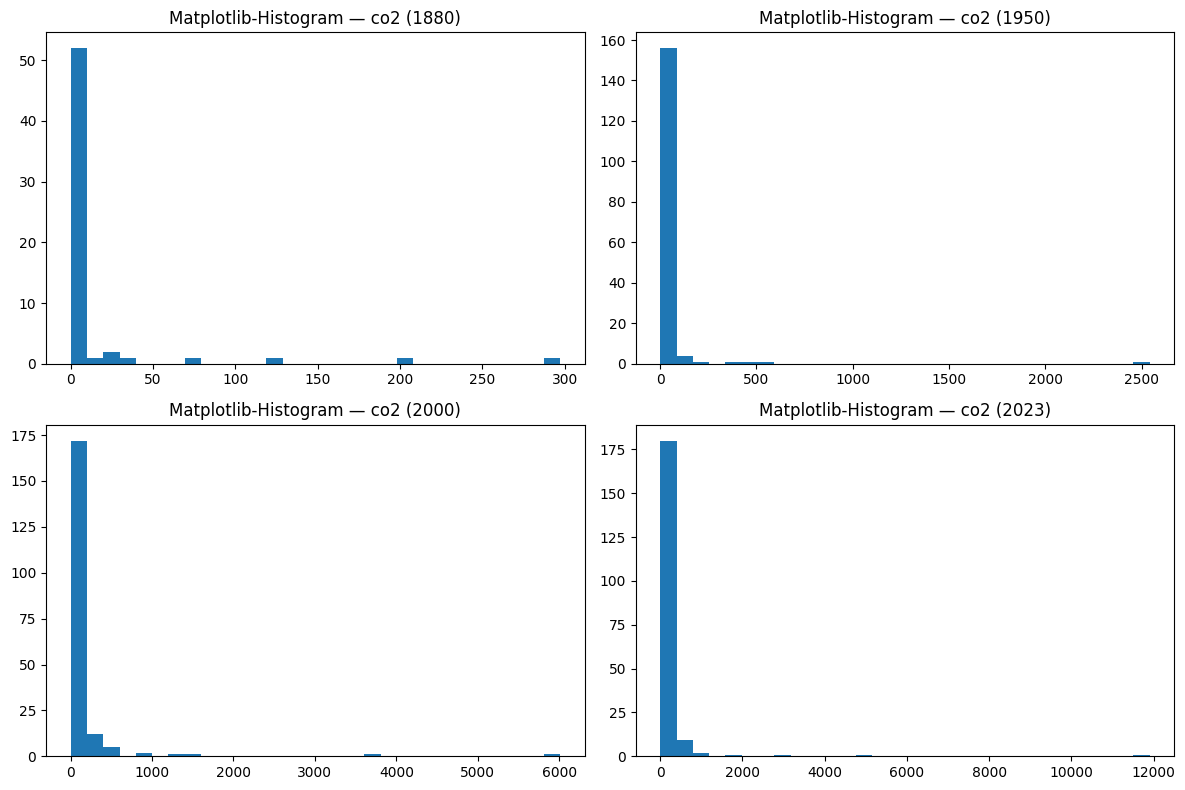

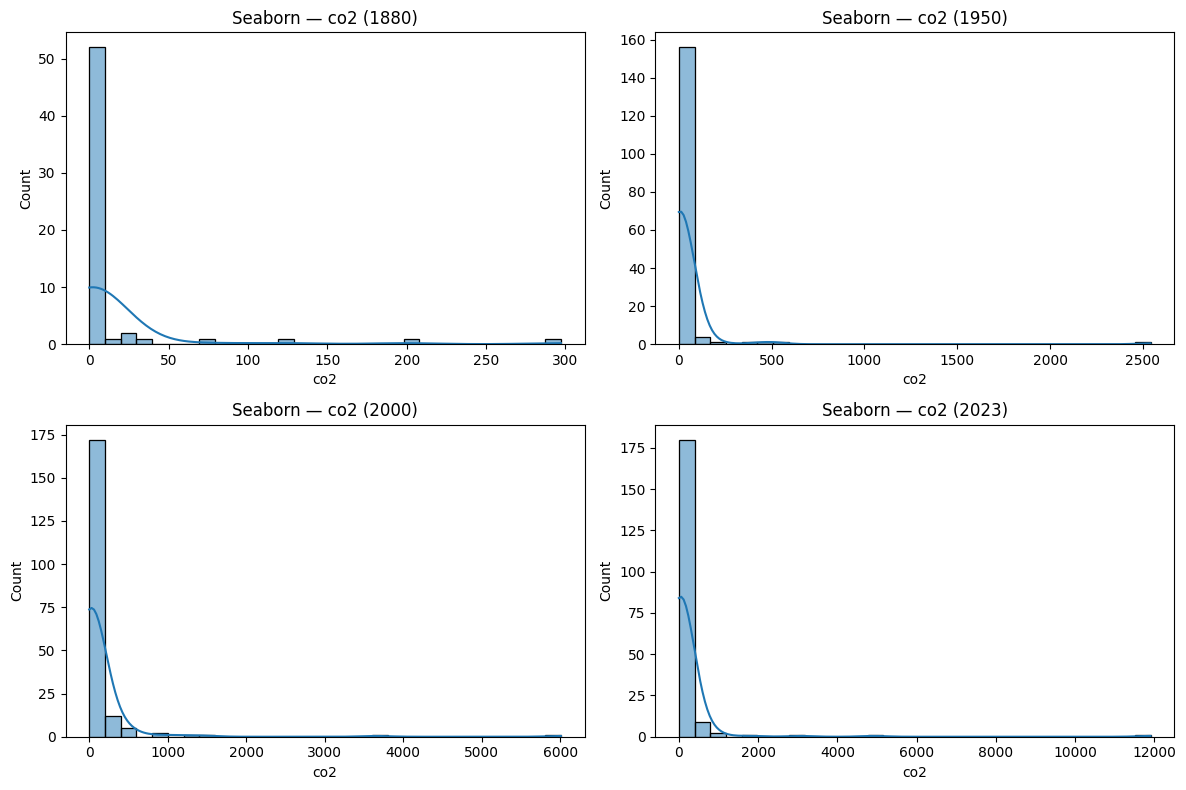

In [29]:

# -----------------------
# 1) Matplotlib
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))     # 创建一个 2x2 的子图网格; figsize=(12,8) 设定整张图的宽×高（英寸);返回 fig（整张图对象）和 axes（2×2 的 Axes 数组）。
axes = axes.flatten()                               # 把 2x2 的 Axes 数组摊平成一维数组，方便方便用 axes[i] 按索引访问,可以用 for 循环遍历。

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]             #  从 df_feat 中筛选出 ​年份等于当前年份 y 的所有行，存入一个新的 DataFrame dff.
    xx = dff[total_col].dropna().astype(float)      # 取出 dff 中的“总排放”列，去掉缺失值并转为 float 类型，存入 xx。
    axes[i].hist(xx, bins=30)                       # 在第 i 个子图上绘制直方图，x轴是value ,分成 30 个bin（bins=30）,y轴是放入每个bin里的国家数量。
    axes[i].set_title(f"Matplotlib-Histogram — {total_col} ({y})")

# enumerate() 是 Python 的一个内置函数，它的作用是：
# 	​给一个可迭代对象（比如列表、元组、字符串等）的每一个元素，附加一个“序号”（即索引），从 0 开始。​

# rep = [1990, 2000, 2010]
# for i, y in enumerate(rep):
#     print(i, y)

# 运行结果会是：

# 0 1990
# 1 2000
# 2 2010

# • enumerate(rep) 会为 rep 中的每一个元素，​自动生成一个序号（索引）和对应的值。
# • 在每次循环中： 
# 	• i 是当前元素的 ​索引（从 0 开始）​​
# 	• y 是当前元素的 ​值

plt.tight_layout()
plt.show()

# -----------------------
# 2) Seaborn
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]
    xx = dff[total_col].dropna().astype(float)
    sns.histplot(xx, bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Seaborn — {total_col} ({y})")

plt.tight_layout()
plt.show()

# -----------------------
# 3) Plotly
# -----------------------
rows = 2
cols = 2
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f"{y}" for y in rep])

for i, y in enumerate(rep):
    dff = df_feat[df_feat[year_col]==y]
    row, col = divmod(i, cols)
    row += 1; col += 1
    fig.add_trace(
        go.Histogram(x=dff[total_col], nbinsx=30, name=str(y)),
        row=row, col=col
    )

fig.update_layout(
    title=f"Plotly Histogram — {total_col}",
    showlegend=False,
    height=800, width=1000
)
fig.show()


In [30]:
import pandas as pd
import numpy as np
import plotly.express as px

country_col = "Name"
year_col    = "year"
total_col   = "co2"

def top10_plus_others(df_year, k=10):
    d = (df_year[[country_col, total_col]]
         .dropna(subset=[total_col])
         .groupby(country_col, as_index=False)[total_col].sum()
         .sort_values(total_col, ascending=False))
    if d.empty or d[total_col].sum() <= 0:
        return pd.DataFrame(columns=[country_col, total_col])
    top10 = d.head(k)
    rest_val = d[total_col].sum() - top10[total_col].sum()
    if rest_val > 0:
        top10 = pd.concat([top10, pd.DataFrame({country_col:["Others"], total_col:[rest_val]})],
                          ignore_index=True)
    return top10

for y in rep:
    dyear = df_feat[df_feat[year_col] == y]
    if dyear.empty:
        print(f"[{y}] 没有数据，跳过")
        continue

    data_show = top10_plus_others(dyear, k=10)
    if data_show.empty:
        print(f"[{y}] 无有效 CO₂ 数据，跳过")
        continue

    # 建一个根节点，便于使用 percentRoot 显示“相对总量”的占比
    data_show["parent"] = f"Total {y}"

    fig = px.treemap(
        data_show,
        path=["parent", country_col],      # 层级：总量 -> 国家（含 Others）
        values=total_col,
        title=f"Top 10 + Others CO₂ Treemap — {y}",
        # 可选：给 Others 上个固定颜色
        # color=country_col,
        # color_discrete_map={"Others": "lightgrey"}
    )

    # 在方块上直接显示“国家名 + 百分比”（相对根节点）
    # percentRoot 是 0~1；用 .1% 格式显示为百分比（1位小数）
    fig.update_traces(
        textinfo="label+percent root",                     # 方块显示名称 + 占比
        texttemplate="%{label}<br>%{percentRoot:.1%}",     # 方块上的文字
        hovertemplate=(
            "<b>%{label}</b><br>"
            "Share: %{percentRoot:.2%}<br>"
            "CO₂: %{value:,.0f} MtCO₂"                     # 显示数值（单位：MtCO₂）
            "<extra></extra>"
        )
    )


    # 让小块时自动隐藏文字，避免挤作一团
    fig.update_layout(
        uniformtext_minsize=10,
        uniformtext_mode="hide",
        margin=dict(t=50, l=10, r=10, b=10)
    )

    # 根节点颜色
    fig.update_traces(root_color="lightgrey")
    fig.show()


In [31]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

country_col = "Name"
year_col    = "year"
total_col   = "co2"

def pareto_fig(df_year, y):
    d = (df_year[[country_col, total_col]]
         .dropna(subset=[total_col])
         .groupby(country_col, as_index=False)[total_col].sum()
         .sort_values(total_col, ascending=False))
    if d.empty: 
        return None
    d["cum_share"] = d[total_col].cumsum() / d[total_col].sum()

    fig = go.Figure()
    fig.add_bar(x=d[country_col], y=d[total_col], name="CO₂")
    fig.add_scatter(x=d[country_col], y=d["cum_share"], name="Cumulative share", mode="lines+markers", yaxis="y2")
    fig.update_layout(
        title=f"Pareto — CO₂ by Country in {y}",
        xaxis_title="Country",
        yaxis_title="CO₂",
        yaxis2=dict(title="Cumulative share", overlaying="y", side="right", range=[0,1]),
        xaxis=dict(tickangle=45),
        margin=dict(t=60, l=40, r=40, b=120)
    )
    return fig

for y in rep:
    dyear = df_feat[df_feat[year_col] == y]
    if dyear.empty:
        print(f"[{y}] 没有数据，跳过")
        continue
    fig = pareto_fig(dyear, y)
    if fig is None:
        print(f"[{y}] 无有效 CO₂ 数据")
    else:
        fig.show()


In [33]:
# --- Part2: Folium Map (improved) ---
import pathlib, requests, folium
import numpy as np
import pandas as pd

# 1) 取最新year + 非空过滤
map_year = int(df_feat[year_col].max())
print("地图年份:", map_year)
df_latest = df_feat[df_feat[year_col] == map_year].copy()

# 2) 仅保留country与数值两column，丢掉 NaN/无穷/负值
d = df_latest[[country_col, total_col]].copy()
d[total_col] = pd.to_numeric(d[total_col], errors="coerce").replace([np.inf, -np.inf], np.nan)
d = d.dropna(subset=[total_col])
d = d[d[total_col] >= 0]

# 3) 按country汇总（有些数据会有重复行）
d = d.groupby(country_col, as_index=False)[total_col].sum()

# 4) normalizecountry名，尽量贴合 GeoJSON 的名字
name_fix = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "Czechia": "Czech Republic",
    "Myanmar (Burma)": "Myanmar",
    "Vietnam": "Viet Nam",
    "Syria": "Syrian Arab Republic",
    "Iran": "Iran (Islamic Republic of)",
    "Moldova": "Republic of Moldova",
    "Congo (Kinshasa)": "Democratic Republic of the Congo",
    "Congo (Brazzaville)": "Republic of the Congo",
    "Tanzania": "United Republic of Tanzania",
    "South Korea": "Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Laos": "Lao People's Democratic Republic",
    "Ivory Coast": "Côte d'Ivoire",
    "Swaziland": "Eswatini",
    "Cape Verde": "Cabo Verde",
    "Palestine": "Palestine, State of",
    "Micronesia": "Micronesia (Federated States of)",
    "Bahamas": "Bahamas",
    # 你若看到graycountry，再把实际名字与 GeoJSON 名字补到这里
}
d["country_norm"] = d[country_col].replace(name_fix)

# 5) 下载/read GeoJSON
geojson_path = pathlib.Path("../data/world-countries.json")
if not geojson_path.exists():
    try:
        url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
        r = requests.get(url, timeout=30); r.raise_for_status()
        geojson_path.write_bytes(r.content)
        print("[Downloaded] world-countries.json")
    except Exception as e:
        print("[Warn] 无法下载 GeoJSON:", e)

# 6) 创建map：设定更小的尺寸 + 控件
m = folium.Map(
    location=[20, 0],
    zoom_start=2,
    # tiles="cartodbpositron",
    tiles=None,          # 先不用默认底图
    width="100%",    # 或者具体像素: 900
    # width=900,
    # height=480,      # 缩小高度
    control_scale=True,
    max_bounds=True,     # 限制视域在世界范围
    max_bounds_viscosity=1.0
)

# 添加不平铺的底图（关键：no_wrap=True）
folium.TileLayer(
    'cartodbpositron',
    name='CartoDB Positron',
    control=False,
    no_wrap=True
).add_to(m)

# 7) 着色map（只在 GeoJSON 存在时）
if geojson_path.exists():
    chor = folium.Choropleth(
        geo_data=str(geojson_path),
        data=d,
        columns=["country_norm", total_col],
        key_on="feature.properties.name",
        fill_color="YlOrRd",
        fill_opacity=0.8,
        line_opacity=0.2,
        nan_fill_color="lightgray",
        legend_name=f"{total_col} ({map_year})"
    ).add_to(m)

    # 8) 增加 hover 提示（displaycountry名与数值）
    folium.GeoJsonTooltip(fields=["name"], aliases=["Country:"]).add_to(chor.geojson)

    # 9) 自动缩放到世界范围（或根据数据 bounds）
    try:
        m.fit_bounds([[-60, -180], [85, 180]])  # 全球视图
    except Exception:
        pass
# 尝试将地图自动缩放到包含全球绝大部分地区的范围：
# 纬度范围：-60°（南纬，避开南极洲） 到 85°（北纬，避开北极极点附近的数据空白）。
# 经度范围：-180° 到 180°。
# 如果出错（比如数据范围有问题），则忽略异常（pass）。

# 10) 可选：保存 HTML 便于查看/提交
# m.save("co2_choropleth_latest.html")

m  # 在 Notebook 中显示

地图年份: 2023


In [34]:

# Part2: Folium map（最新年） 用 Folium 画一张全球map，display最新一年的各国 CO₂ emissions量distribution。
import requests, json

# 取 year_col 的最大值（最新year），作为map展示year。df_latest：筛选出这一年的数据。
map_year = int(df_feat[year_col].max()); print("地图年份:", map_year)
df_latest = df_feat[df_feat[year_col]==map_year].copy()

# 按country汇总（有些country可能有多个记录），并生成一个“标准化country名”column，方便后续和 GeoJSON 里的country名对齐。保留两column：country名 (country_col) 和总emissions量 (total_col)。result：每个country在该年对应一个总emissions量。
df_geo = df_latest[[country_col, total_col]].groupby(country_col, as_index=False).sum()

# normalize国名，避免mapmatch失败
name_fix = {"United States":"United States of America","Russia":"Russian Federation"}
df_geo["country_norm"] = df_geo[country_col].replace(name_fix)


# read/下载 GeoJSON 边界文件
geojson_path = pathlib.Path("../data/world-countries.json")
if not geojson_path.exists():
    try:
        r = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json", timeout=30)
        r.raise_for_status(); geojson_path.write_bytes(r.content); print("[Downloaded] world-countries.json")
    except Exception as e:
        print("[Warn] 无法下载 GeoJSON:", e)

# 创建map对象,initialize一张map：location=[20,0] → map中心点在经纬度 (20°N, 0°E)，大约在非洲中部，保证全球居中display。zoom_start=2 → 初始缩放级别，能看到整个世界。tiles="cartodbpositron" → 使用灰白底图，突出数据颜色。
m = folium.Map(location=[20,0], zoom_start=2, tiles="cartodbpositron")

# 绘制 Choropleth（分级着色map）geo_data：country边界 GeoJSON 文件。data：你的 DataFrame（country名 + 对应emissions值）。olumns：["country名","数值"] → 指定match关系。
if geojson_path.exists():
    folium.Choropleth(geo_data=str(geojson_path), data=df_geo, columns=["country_norm", total_col],
                      key_on="feature.properties.name", fill_color="YlOrRd", fill_opacity=0.7, line_opacity=0.2,
                      nan_fill_color="lightgray", legend_name=f"{total_col} ({map_year})").add_to(m)
# geo_data：country边界 GeoJSON 文件。
# data：你的 DataFrame（country名 + 对应emissions值）。
# columns：["country名","数值"] → 指定match关系。
# key_on="feature.properties.name"：告诉 Folium 用 GeoJSON 里country的 name 属性来match。
# fill_color="YlOrRd"：颜色渐变（黄色 → 红色），表示emissions量从低到高。
# nan_fill_color="lightgray"：数据missing的countrydisplay为gray。
# legend_name：map右下角display的图例标题。

m

地图年份: 2023


In [35]:

# Part3: JupyterDash 小仪表板
# --- Dash in Notebook: robust launcher (works for Dash >=2.11 and older) ---
# df is cleaned DataFrame, inclulding all columns
import dash
from packaging.version import Version

# 你的数据准备不变
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()                       # 从原始数据(cleaned) df 中筛选出所有数值型列的列名，存入列表 numeric_cols。
preferred = [c for c in ["total_col","co2_per_capita","share_global_co2",                   # 定义了一个你优先展示的指标列表​（比如总排放量 total_col、人均排放 co2_per_capita、煤炭排放 coal_co2 等等）。
                         "coal_co2","oil_co2","gas_co2","cement_co2","flaring_co2"]
             if c in numeric_cols]
metrics = preferred if preferred else numeric_cols[:5]                                      # 如果优先指标列表 preferred 不为空（即你关心的那些指标都是数值型），那么就使用它作为下拉菜单选项；  
min_year = int(df[year_col].min()); max_year = int(df[year_col].max())

# 公共布局/回调function封装
def build_app(app):
    from dash import html, dcc, Input, Output
    import plotly.express as px
    import numpy as np
    # 延迟导入 Dash 组件和 Plotly.放在函数内部，而不是全局顶部。
# 好处：避免污染全局命名空间，也避免在某些环境下（比如未安装 plotly/dash 时）导入失败导致脚本崩溃。特别适合封装成函数或模块。（function内导入避免顶层污染，同时兼容不同环境）。

    
#     定义页面布局：（HTML + 控件）

    app.layout = html.Div([                                                             # 整个仪表盘的最外层是一个 html.Div，里面包含标题和控件，以及两个图表。
        html.H3("CO₂ Emissions Dashboard"),                                             # 第一部分是标题：“CO₂ Emissions Dashboard”。标题 H3

#   第二部分是一些控件：下拉框、滑块、单选按钮，用户可以选择指标、年份和数据变换方式。
        html.Div([
            html.Label("Metric:"),
            dcc.Dropdown(options=[{"label": m, "value": m} for m in metrics],           # 下拉框 Dropdown：选哪一个指标（如 co2、coal_co2…）。
                         value=metrics[0], id="metric"),
            html.Label("Year:"),
            dcc.Slider(min_year, max_year, 1, value=max_year, marks=None,               # 滑块 Slider：选年份（范围为最小到最大年份，默认最大年）。
                       tooltip={"always_visible": True}, id="year"),
            html.Label("Transform:"),
            dcc.RadioItems(options=[{"label":"Raw","value":"raw"},                      # 单选 RadioItems：选数据变换（原始/raw、对数/log1p、Z 分数/zscore、Min-Max/minmax）。
                                    {"label":"log1p","value":"log1p"},
                                    {"label":"zscore","value":"zscore"},
                                    {"label":"minmax","value":"minmax"}],
                           value="raw", id="transform", inline=True)
        ], style={"maxWidth":"760px"}),
        # html.Div([dcc.Graph(id="hist"), dcc.Graph(id="map")])                           # 两个 Graph 容器：displayhistogram和map。
        html.Div([                                                                        # 用内联样式把两个图放在一行，宽度各占 48%，高度 400px。
            dcc.Graph(id="hist", style={"width":"48%", "display":"inline-block", "height":"400px"}),
            dcc.Graph(id="map", style={"width":"48%", "display":"inline-block", "height":"400px"})
            ])

    ])


    # 定义一个回调function：当 metric / year / transform 任一改变时，重新计算并返回两张图（histogram和map）。定义交互回调函数：动态更新图表
    @app.callback(Output("hist","figure"), Output("map","figure"),                                  # 当以下任意一个输入组件发生变化时：用户选择了不同的指标（metric）,户滑动选择了不同年份（year）,用户选择了不同的数据变换方式（transform）,那么就会触发下面的函数，重新计算并更新两个输出组件：直方图（hist）地图（map）
                  Input("metric","value"), Input("year","value"), Input("transform","value"))
    def update(metric, year, transform):                # 回调函数
        # dff = df[df[year_col]==year].copy()                         # dff：取出该年份的数据子集
        dff = df[(df[year_col] == year) & (df[description_col] == "Country")].copy()    # dff：取出该年份且 Description == "Country" 的数据子集        # dff：取出该年份且 Description（不区分大小写）等于 "country" 的数据子集
        series = pd.to_numeric(dff[metric], errors="coerce")        # series：取出该年所选指标列，转为数值（非法值变 NaN）
        if transform=="log1p":                                  # 根据选择的变换方式，三种变换：log1p：对数压缩，适合极右偏的总量数据（避免大国“淹没”小国）。zscore：标准化到均值 0、方差 1，适合比较“高于/低于平均值多少”。minmax：缩放到 0~1，适合在统一量纲下对比。
                                                                # else（raw）不处理。带有 if sd>0、if mx>mn 的保护，避免除零。
            series = np.log1p(series.clip(lower=0))
        elif transform=="zscore":
            mu, sd = np.nanmean(series), np.nanstd(series, ddof=0)
            series = (series-mu)/sd if sd>0 else series*0
        elif transform=="minmax":
            mn, mx = np.nanmin(series), np.nanmax(series)
            series = (series-mn)/(mx-mn) if mx>mn else series*0
        
        dff["_metric_view_"] = series                           # 把变换后的结果放到 dff["_metric_view_"] 列，方便画图时引用。    
        fig_hist = px.histogram(dff, x="_metric_view_", nbins=30,                               # A. 绘制直方图（分布图）用 Plotly 画直方图：展示“所选年份，各国该指标（经变换后）的分布形态”。
                                title=f"Histogram — {metric} ({year}) [{transform}]")
        fig_map = px.choropleth(dff, locations=country_col, locationmode="country names",       # 用 Plotly 画 Choropleth（分级着色地图）：展示“所选年份，各国该指标（经变换后）的地理分布”。设置地理样式：显示国界/海岸线，使用自然地理投影，收紧边距。返回两张图，Dash 会自动把它们放到对应的 Graph 组件里。
                                color="_metric_view_", hover_name=country_col,
                                title=f"Choropleth — {metric} ({year}) [{transform}]",
                                color_continuous_scale="YlOrRd")
        fig_map.update_geos(showcountries=True, showcoastlines=True, projection_type="natural earth")   #优化地图显示效果：显示国界和海岸线，使用自然地球投影。调整边距，让地图显示更紧凑美观。
        fig_map.update_layout(margin=dict(l=0,r=0,t=50,b=0))
        return fig_hist, fig_map                            # 返回两张图，回调函数返回两个 Figure 对象，Dash 会自动将它们分别渲染到页面上的 id="hist" 和 id="map" 的 Graph 组件中。

# --- 新方式：Dash>=2.11 直接在 Notebook 内联运行 ---
if Version(dash.__version__) >= Version("2.11.0"):
    from dash import Dash, jupyter_dash
    jupyter_dash.default_mode = "inline"     # 也可用 "external"/"tab"/"jupyterlab"
    app = Dash(__name__)
    build_app(app)
    app.run(jupyter_mode="inline", port=8052, jupyter_height=900)

# --- 旧方式：Dash<2.11 使用 JupyterDash ---
else:
    from jupyter_dash import JupyterDash
    app = JupyterDash(__name__)
    build_app(app)
    app.run_server(mode="inline", port=8052, height=600)

C:\Users\wumin\AppData\Local\Temp\ipykernel_3020\939678602.py:73: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.

